In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
url = 'https://media.githubusercontent.com/media/neurospin/pystatsml/master/datasets/iris.csv'
df = pd.DataFrame()
try:
    df = pd.read_csv(url)
except Exception as e:
    df = pd.read_csv('iris.csv')
    print(f'An error occured {e}\nUsing local dataset')
# df.to_csv('iris.csv')
df.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
print('\nDataset Description')
df.describe()


Dataset Description


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Separating species from rest of the data
X = df.drop(columns=['species'])
Y = df['species']

<Axes: >

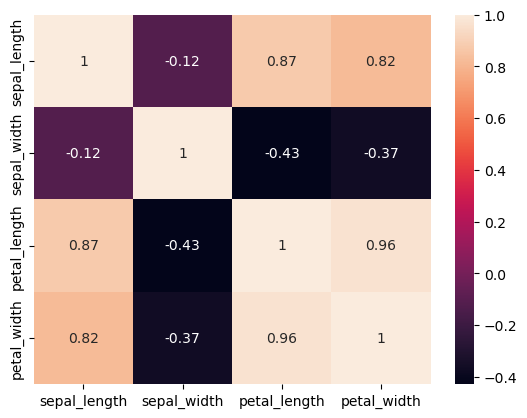

In [5]:
sns.heatmap(X.corr(), annot=True)

In [6]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)


In [7]:
# Describe the structure of correlations among variables
print("\nCorrelation Matrix Among Variables:")
corr_matrix = pd.DataFrame(x_scaled, columns=X.columns).corr()
print(corr_matrix)


Correlation Matrix Among Variables:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


#### 1. Describe the structure of correlations among variables


In [8]:
print("\nCorrelation Matrix Among Variables:")
corr_matrix = pd.DataFrame(x_scaled, columns=X.columns).corr()
print(corr_matrix)



Correlation Matrix Among Variables:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


#### 2. Compute PCA with the maximum number of components


In [9]:
pca = PCA(n_components=len(X.columns))  # Compute all components
X_pca = pca.fit_transform(x_scaled)



#### 3. Cumulative explained variance ratio


In [10]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\nExplained Variance by Each Component:")
print(explained_variance)
print("\nCumulative Explained Variance Ratio:")
print(cumulative_variance)



Explained Variance by Each Component:
[0.72962445 0.22850762 0.03668922 0.00517871]

Cumulative Explained Variance Ratio:
[0.72962445 0.95813207 0.99482129 1.        ]



#### 4. Determine K (number of components) by cumulative variance


In [11]:
K = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components to keep (explains 95% variance): {K}")



Number of components to keep (explains 95% variance): 2



#### 5. Print the K principal component directions and correlations with original variables


In [12]:
print("\nPrincipal Components Directions (PCA Loadings):")
loadings = pca.components_[:K]
print(loadings)



Principal Components Directions (PCA Loadings):
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]



#### 6. Correlation of original variables with principal components


In [13]:
correlations = pd.DataFrame(loadings, columns=X.columns)
print("\nCorrelations of the Principal Components with the Original Variables:")
print(correlations)



Correlations of the Principal Components with the Original Variables:
   sepal_length  sepal_width  petal_length  petal_width
0      0.521066    -0.269347      0.580413     0.564857
1      0.377418     0.923296      0.024492     0.066942



#### 7. Plot samples projected into the first K principal components and color by species


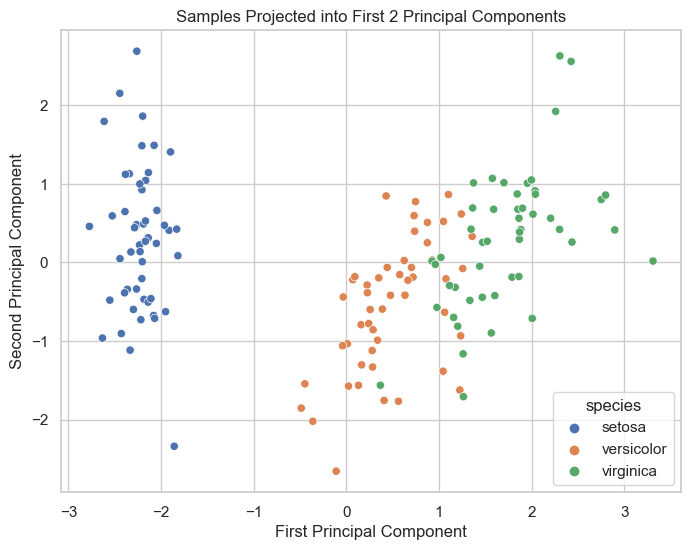

In [14]:
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=Y)
plt.title(f'Samples Projected into First {K} Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()